In [4]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Scan Proton Orientations

In [22]:
output_dir = 'outputs/proton_locations'
filenames = sorted(list(os.listdir(output_dir)))
print(f'number of files in the folder: {len(filenames)}')

number of files in the folder: 13


In [23]:
def get_xyz_from_name(filename):
    """extract x, y, and z coordinates from a filename.
    """
    pattern = r'eeH_x([0-9np]+)y([0-9np]+)z([0-9np]+)_0p35MHz'
    found = re.search(pattern, filename)
    if not found:
        raise ValueError('xyz pattern not found in the filename.')
    try:
        x = found.group(1).replace('n', '-').replace('p', '.')
        y = found.group(2).replace('n', '-').replace('p', '.')
        z = found.group(3).replace('n', '-').replace('p', '.')
        x = float(x)
        y = float(y)
        z = float(z)
        return x, y, z
    except Exception as e:
        print('pattern not fully matched.')
        raise e

In [24]:
dfs = []
coords = []
for filename in filenames:
    filepath = os.path.join(output_dir, filename)
    df = pd.read_csv(filepath, skiprows=1, header=None)
    dfs.append(df)
    xyz = get_xyz_from_name(filename)
    coords.append(xyz)

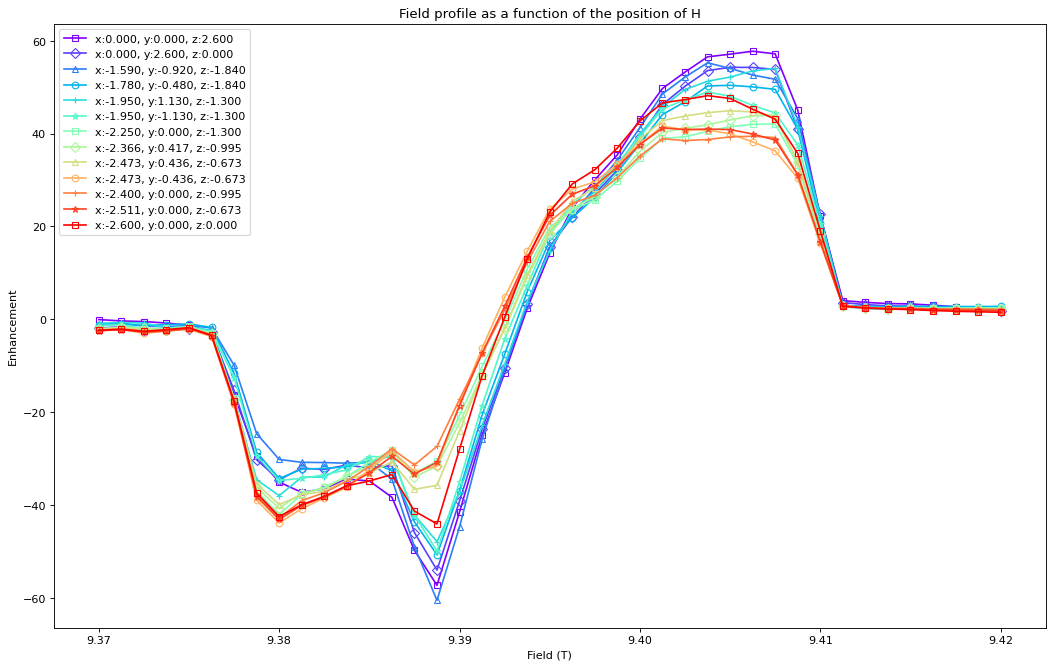

In [25]:
n = len(dfs)
colors = plt.cm.rainbow(np.linspace(0,1,n))
markers = ['s', 'D', '^', 'o', '+', '*']

fig = plt.figure(figsize=(16, 10), dpi=80)
for i, filename in enumerate(filenames):
    marker = markers[i%len(markers)]
    x, y, z = coords[i]
    label = f'x:{x:0.3f}, y:{y:0.3f}, z:{z:0.3f}'
    plt.plot(dfs[i][0], dfs[i][1], f'{marker}-', c=colors[i], markerfacecolor='none', label=label)
plt.legend(loc='upper left')
plt.xlabel('Field (T)')
plt.ylabel('Enhancement')
plt.title('Field profile as a function of the position of H')
plt.show()